# Histogram of Oriented Gradients (HOG) with MNIST Dataset

In [13]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.preprocessing import OneHotEncoder
from skimage.feature import hog
from sklearn import metrics, svm
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
def apply_hog(img, o = 9, ppc = (8, 8), cpb = (2, 2)):
    # apply HOG to image
    features = hog(
        img,
        orientations = o,
        pixels_per_cell = ppc,
        cells_per_block = cpb,
    )

    return features

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


The `MNIST` class loads in the data. Additionally, we extract HOG features.
- Train set size: 60000
- Test set size: 10000

All **original** images have size $28\times 28$ pixels.

In [46]:
# load datasets and transform to tensors
# mnist_train = MNIST("./data/", download = True, transform = transforms.ToTensor())
mnist_train = MNIST("./data/", download = True, transform = transforms.Lambda(apply_hog))
mnist_test = MNIST("./data/", train = False, download = True, transform = transforms.Lambda(apply_hog))

print("Train Set (Image):", mnist_train.data.shape)
print("Train Set (Target):", mnist_train.targets.shape)
print("Test Set Size:", len(mnist_test))

Train Set (Image): torch.Size([60000, 28, 28])
Train Set (Target): torch.Size([60000])
Test Set Size: 10000


After transformation, the data (with the extracted HOG features) is a 1D array and its label is a scalar.

In [55]:
print(len(mnist_train[0][0]))
print(mnist_train[0][1])

144
5


**NOTE:** The `ToTensor()` method transform a `PIL` image into a Torch tensor!

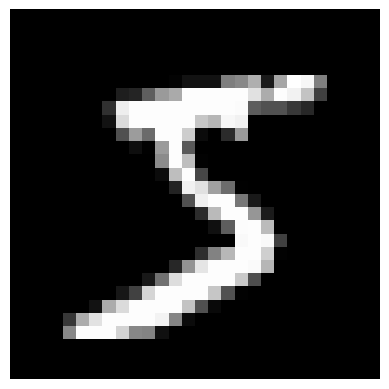

torch.Size([28, 28])


In [47]:
# sample first image
sample_image = mnist_train.data[0, :, :]
sample_target = mnist_train.targets[0]

plt.imshow(sample_image, cmap = "gray")
plt.axis("off")
plt.show()

print(sample_image.shape)

We initialize the data loader.

In [68]:
BATCH_SIZE = 128

train_loader = DataLoader(mnist_train, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(mnist_test, batch_size = BATCH_SIZE, shuffle = False)

In [65]:
# create SVM classifier
clf = svm.SVC(gamma = 0.001)

In [66]:
# fit model
for i, (images, labels) in enumerate(train_loader):
    if i == 3:
        break

    clf.fit(images, labels)

In [ ]:
# predict
for i, (images, labels) in enumerate(test_loader):
    if i == 3:
        break
    predictions = clf.predict(images)

In [61]:
# create SVM classifier
clf = svm.SVC(gamma = 0.001)

# train SVM
for i, (images, targets) in enumerate(train_loader):
    # flatten images
    images = images.view(images.size(0), -1)

    # convert targets to one hot encoding
    targets = targets.numpy().reshape(-1, 1)
    targets = one_hot.fit_transform(targets)

    # train SVM
    clf.fit(images, targets)

    # print progress
    if (i + 1) % 100 == 0:
        print("Epoch [{}/{}], Step [{}/{}]".format(1, 1, i + 1, len(train_loader)))

bool